# yolo3数据整理-训练-部署-示例读码器训练
                                             make by haifenye
                          

## 数据整理

创建Annotations和JPEGImages两个文件夹

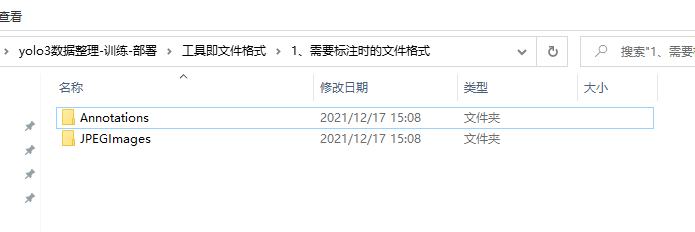

#### 图像拷贝整理

获取到的数据这样：

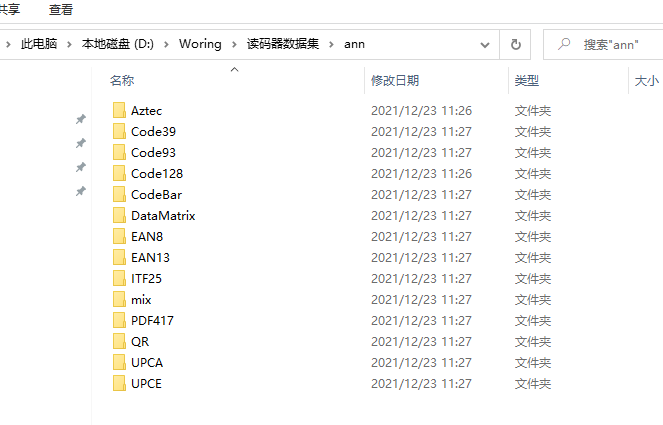

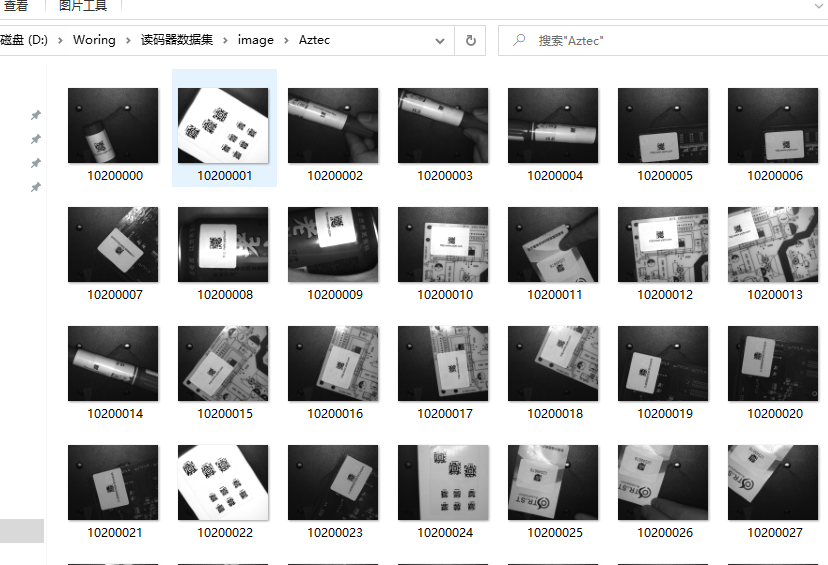

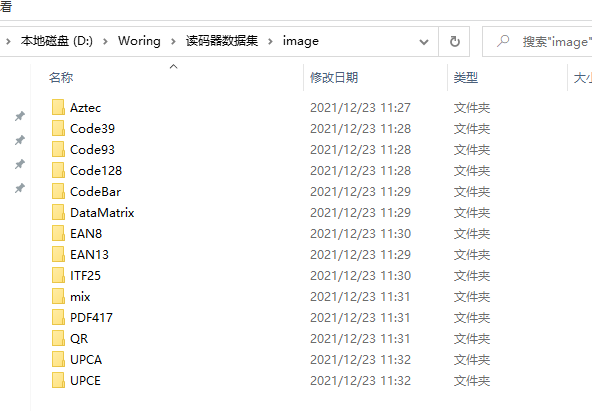

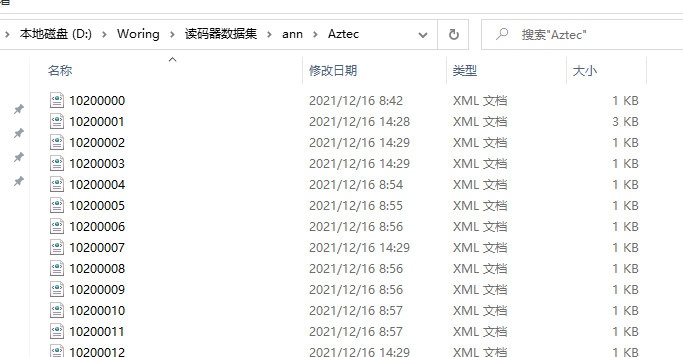

将ann下一级所有(14个文件夹内)文件夹内的标注xml文件(00200000.xml)拷贝到yolo3项目下的data/Annotations文件夹中,将image下一级所有(14个文件夹内)文件夹内的图像bmp文件拷贝到yolo3项目下的data/JPEGImages文件夹中

#### yolo数据集格式转换1

由于图像是单通道的bmp图像，而模型需要使用3通道的图像，所以需要将图像转为三通道。

在yolo3/data下创建.py运行文件，加入如下代码：

In [ ]:
import cv2
import numpy as np
import os
import random
from os import listdir, getcwd

path =  getcwd()
imgfilepath = path + '/JPEGImages'
aimfilepath = path + '/images'

total_img = os.listdir(imgfilepath)

for name in total_img:
    namepath =  imgfilepath + "/" + name
    img = cv2.imread(namepath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = np.zeros_like(img)
    img2[:, :, 0] = gray
    img2[:, :, 1] = gray
    img2[:, :, 2] = gray
    imgusename = name.split(".", 1)
    save = aimfilepath + "/" + imgusename[0] + ".jpg"
    cv2.imwrite(save, img2)

#### 环境搭建

下载yolo3模型，下载第八版

https://github.com/ultralytics/yolov3/releases

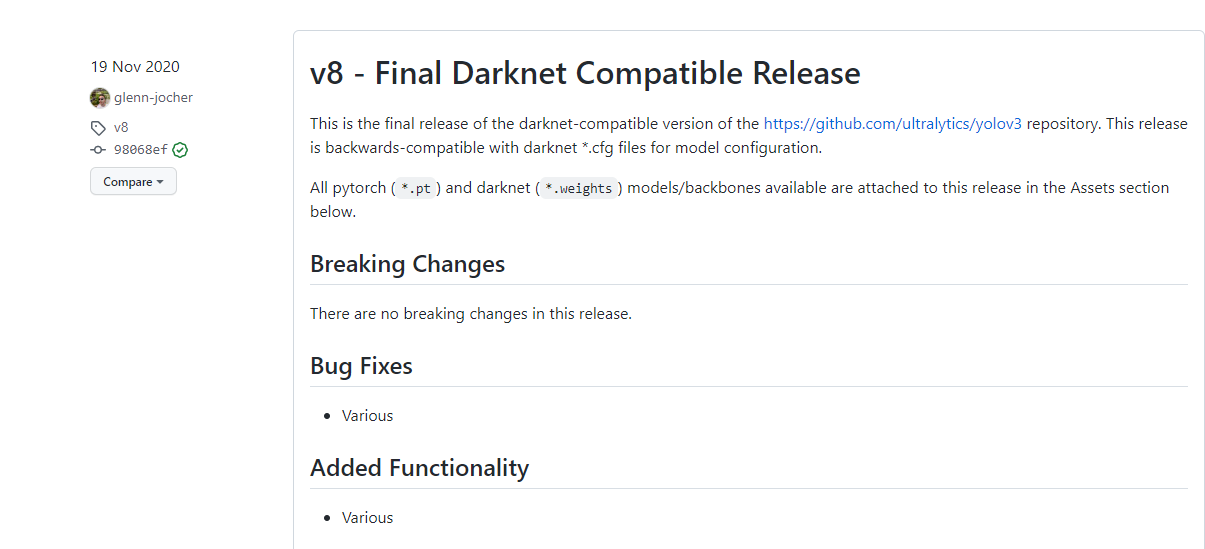

1、打开解压的文件夹下，在顶部路径栏处输入cmd，进入命令行提示符<br/>
2、输入：conda create -n yolo3 python==3.7.2<br/>
3、输入：conda activate yolo3<br/>
4、输入：CPU: conda install pytorch torchvision torchaudio cpuonly -c pytorch<br/>
     GPU:conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch<br/>
4、输入：pip install requirements.txt<br/>

最后，在pycharm中加载yolo3的环境，打开yolo3的代码

建议：环境自己搭建，代码使用本次提供的代码，因为本代码增加数据处理、修改训练参数等操作，而github上没有提供针对自己数据集的训练部分，仅能运行测试demo，开启不了训练。

#### yolo数据集格式转换2

找到yolo3文件夹下的data文件夹

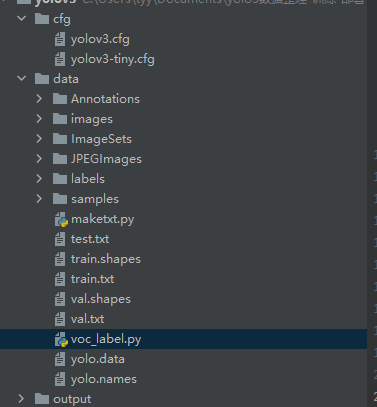

1、先运行makeTxt.py,将数据分成训练集，测试集和验证集<br/>


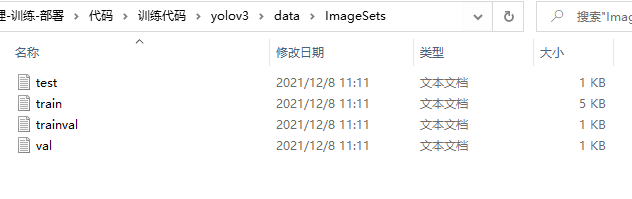

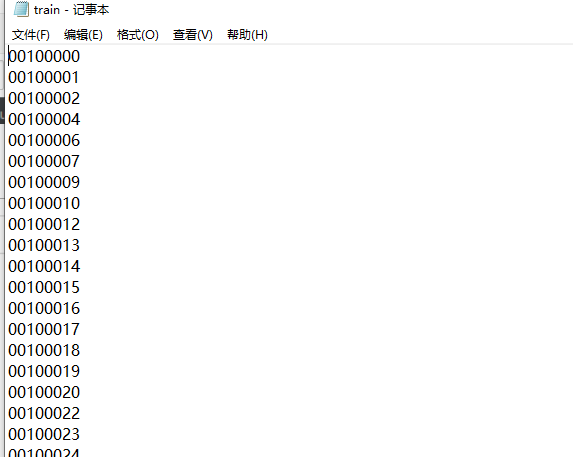

2、在voc_label.py中第9行将classes = []改为你的类别，如本次改为classes = ['BarCode','DataCode']

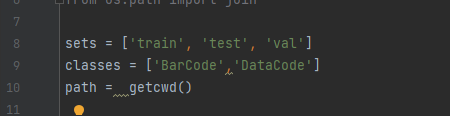

3、在运行voc_label.py,得到labels的具体内容以及data目录下的train.txt，test.txt，val.txt

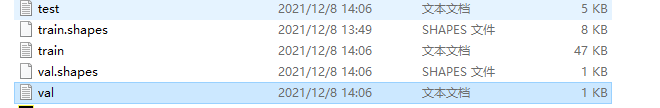

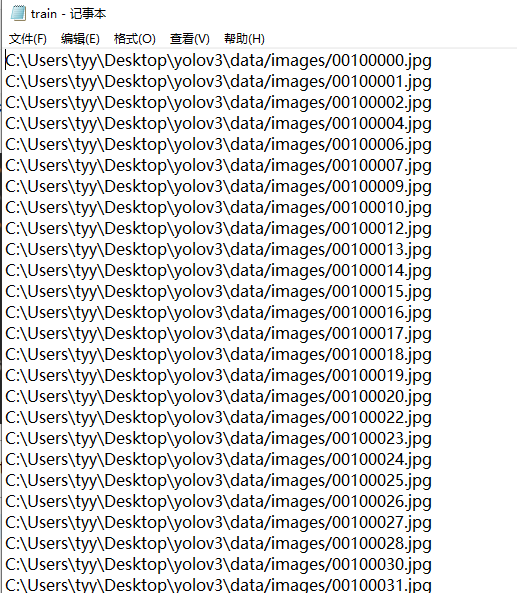

4、修改该目录下yolo.names文件，该目录下为你需要的标签类别：一行一个类别

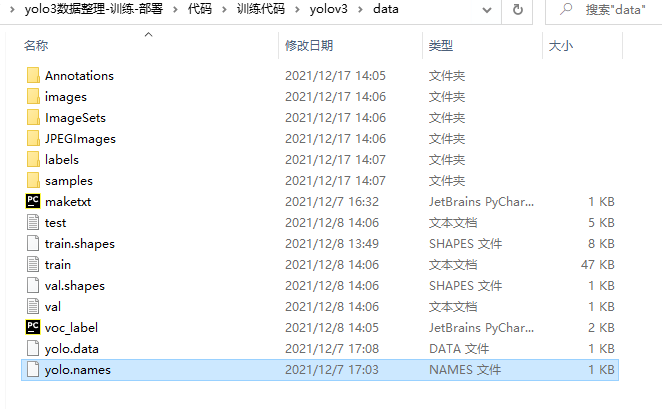

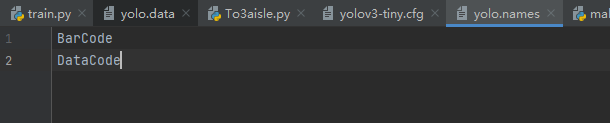

#### 注意 标签的排列顺序必须与voc_label.py,第9行中classes = ['BarCode','DataCode']的类别标签排列顺序一致。

修改该目录下yolo.data中的classes值，其代表了类别的数量。在读码器项目中，填2

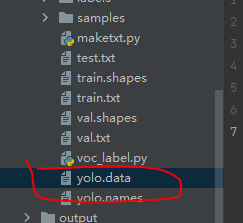

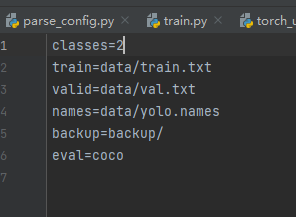

5、打开yolo3下的cfg目录下的yolo3-tiny.cfg，修改[yolo3]下的classes，此为你需要训练的类别数

修改其上[convolutional]处的filters，计算公式

filter =3*（classes + 5）

eg：此处filter =3*（2 + 5）=21

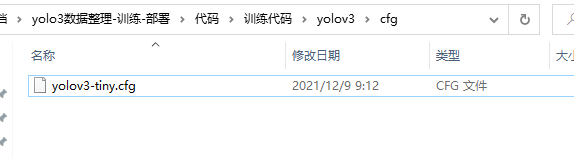

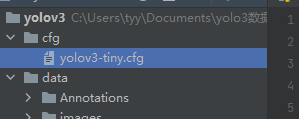

yolo3-tiny.cfg下工4处要修改:

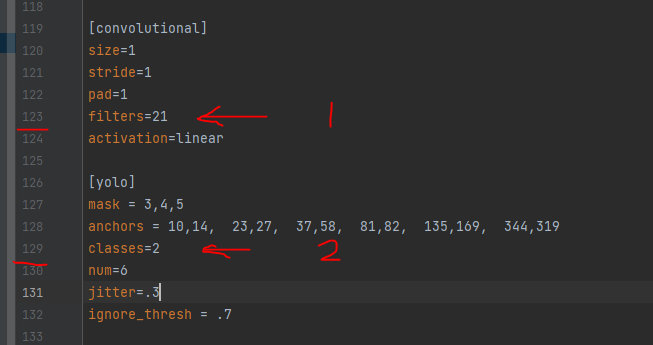

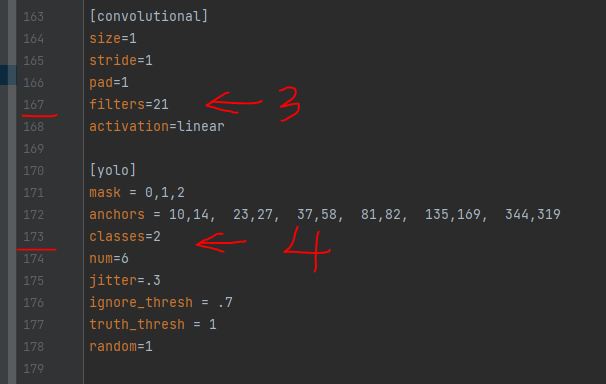

## 训练

使用本次配置好的代码即可，点击yolo3下的train.py

对原代码修改的地方如下所示，共4处，同时也是需要注意的点：


1、394行，epoch：是训练迭代次数，建议一般设为270次。<br/>
2、395行，batch_size:是一次迭代输入的图像数量，在此由于本计算机内存小，故设为8，如果是GPU训练，可以设为16或者32。<br/>
3、409行，device，训练是cpu还是gpu。<br/>

重要参数说明参数：

1、394行，epoch：是训练迭代次数，建议一般设为270次。<br/>
2、395行，batch_size:是一次迭代输入的图像数量，在此由于本计算机内存小，故设为8，如果是GPU训练，可以设为16或者32。<br/>
3、396行，cfg:是配置参数文件的路径，已将配置好了，请勿修改。<br/>
4、397行，data：是训练数据的输入地址,将配置好了，请勿修改。<br/>
5、399行，img-size，实验过，该参数请勿修改。<br/>
6、409行，device，训练是cpu还是gpu。<br/>

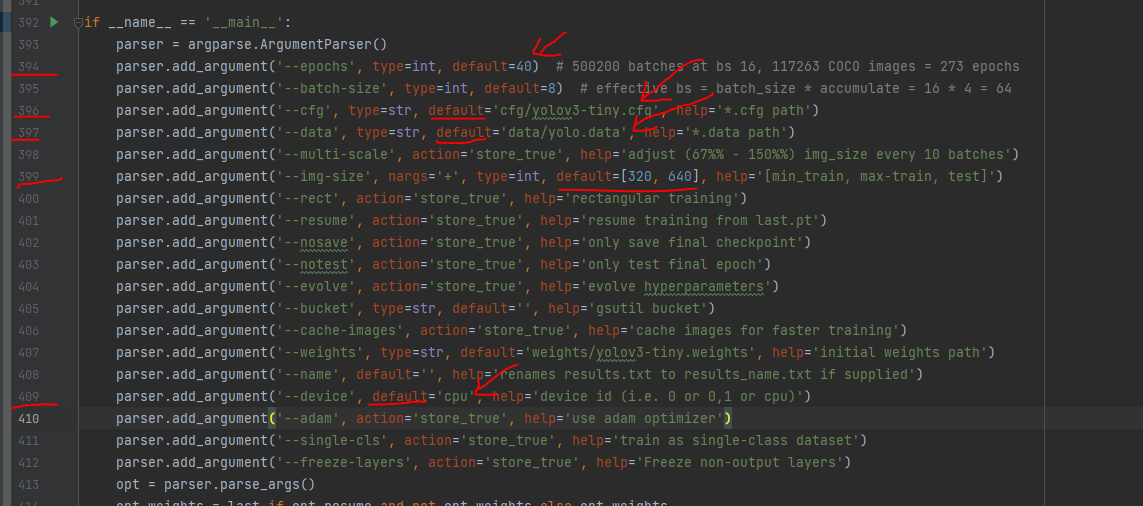

在初始阶段建议将[394]行的epchs的default设为10，训练完成，检测一下是否满足要求，满足则将该值设为200，继续训练

## 模型部署

1、点击loyo3下的ptToweights.py,将模型转换成可调用格式

2、拷贝weights文件夹下的best.weights模型权重，data文件夹下的yolo.names标签文件，cfg文件夹下的yolov3-tiny.cfg模型参数，

到所要部署的c#软件中。例如本次示例中，拷贝到...\部署代码\Yolo3\Yolo3\bin\x64\Debug\model文件夹下。使用yolo3调用接口demo跑程序